<a href="https://colab.research.google.com/github/abhidhawale/MachineLearningProjects/blob/master/Solution_A_39_SupportVectorMachine_ML_Avocados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Implement the Support Vector Machine Classifier on the "Avocados" dataset
1. The target variable is **Type**
2. Split the data into training and testing parts : 80% for
training and 20% for testing.
3. Check the accuracy and the Confusion Matrix to check the validity of the model
4. Make prediction for **Type** for feature matrix :
               [1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0]

In [ ]:
import pandas as pd
import seaborn as sb

df = pd.read_csv('/content/dataset_39_1-avocado.csv')
df.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


##Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
cat_val = df[['type', 'year', 'region']]
le = LabelEncoder()
for i in cat_val:
  df[i] = le.fit_transform(cat_val[i])

df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,0,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,0,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,0,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,0,0


##Splitting data into Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['Unnamed: 0', 'Date', 'type'], axis=1)
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

#Training model on the training set

In [ ]:
from sklearn.svm import SVC
mod = SVC(kernel = 'rbf', random_state = 0)

result = mod.fit(X_train, y_train)

In [ ]:
pred = result.predict(X_test)
pred

array([1, 0, 1, ..., 1, 1, 1])

### Checking model predictions for accuracy and analysing confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
print('Accuracy score: ', accuracy_score(y_test, pred))

Accuracy score:  0.9347945205479452


In [ ]:
print('Confusion matrix')
conf_df = pd.DataFrame(confusion_matrix(y_test, pred), index=['Actual 0', 'Actual 1'], columns=['Actual 0', 'Actual 1'])
conf_df

Confusion matrix


,Actual 0,Actual 1
Actual 0,1612,163
Actual 1,75,1800


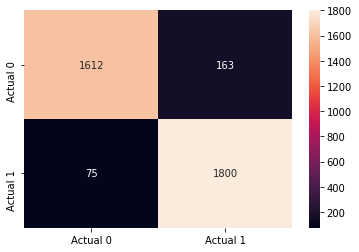

In [ ]:
sb.heatmap(conf_df, annot=True, fmt='2.0f')

##Deploying model

In [ ]:
new_pred = result.predict([[1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,0]])
new_pred

array([0])